In [1]:
from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import tomoSegment_dataset
from cryoS2Sdrop.analyze import plot_centralSlices

import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from torch.utils.data import Dataset, DataLoader

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
path_data, path_target = setup.get_paths(['tomo02', 'tomo04'], 'cryoCARE')

In [14]:
Ncl = 2
dim_in = 84
lr = 1e-4
weight_decay = 0
Lrnd = 0
augment_data = False

my_dataset = tomoSegment_dataset(path_data, path_target, dim_in, Ncl, Lrnd, augment_data)
len(my_dataset)

152

In [19]:
batch_data, batch_target = my_dataset.get_patch(1)
batch_data.shape, batch_target.shape

(torch.Size([84, 84, 84]), torch.Size([84, 84, 84]))

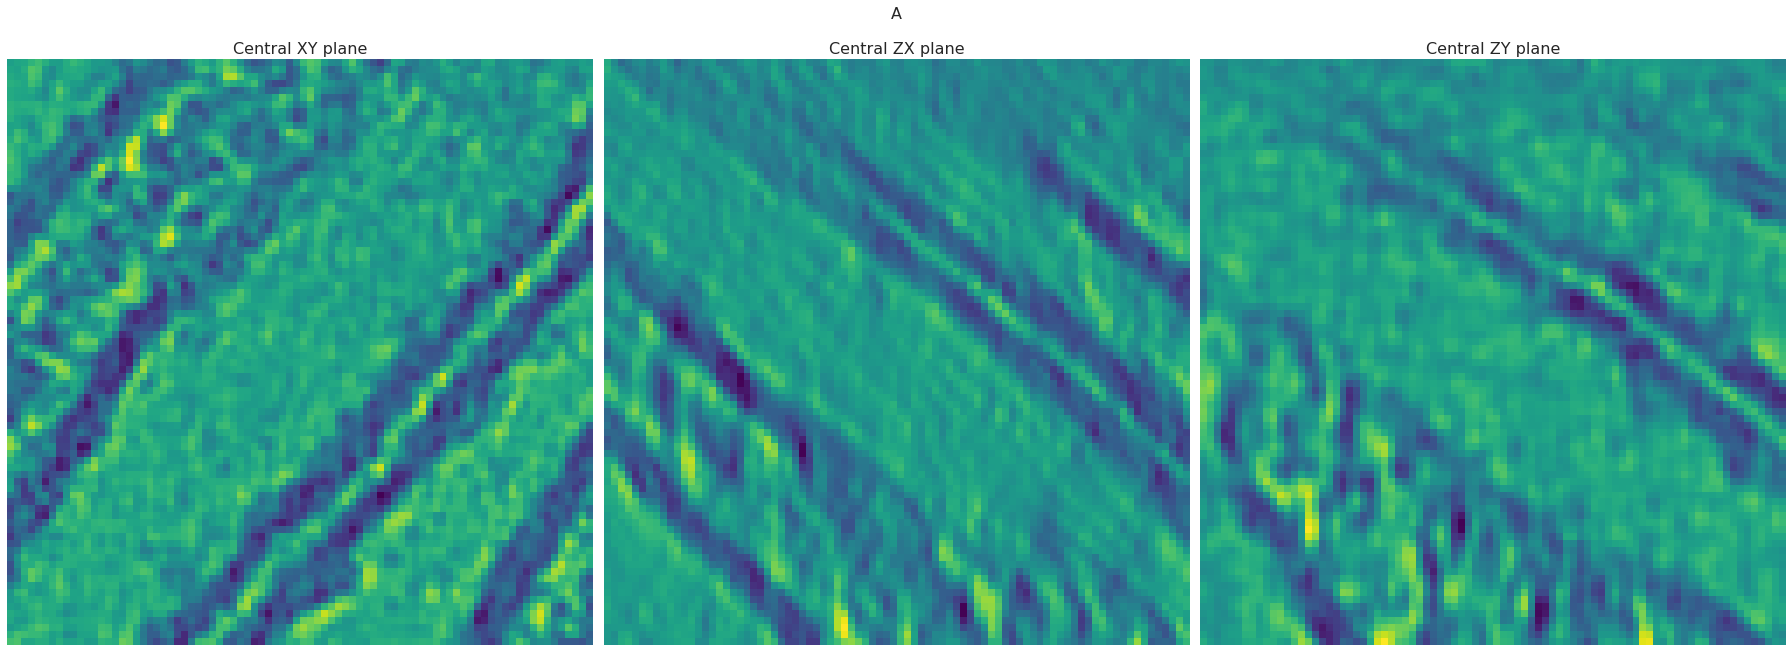

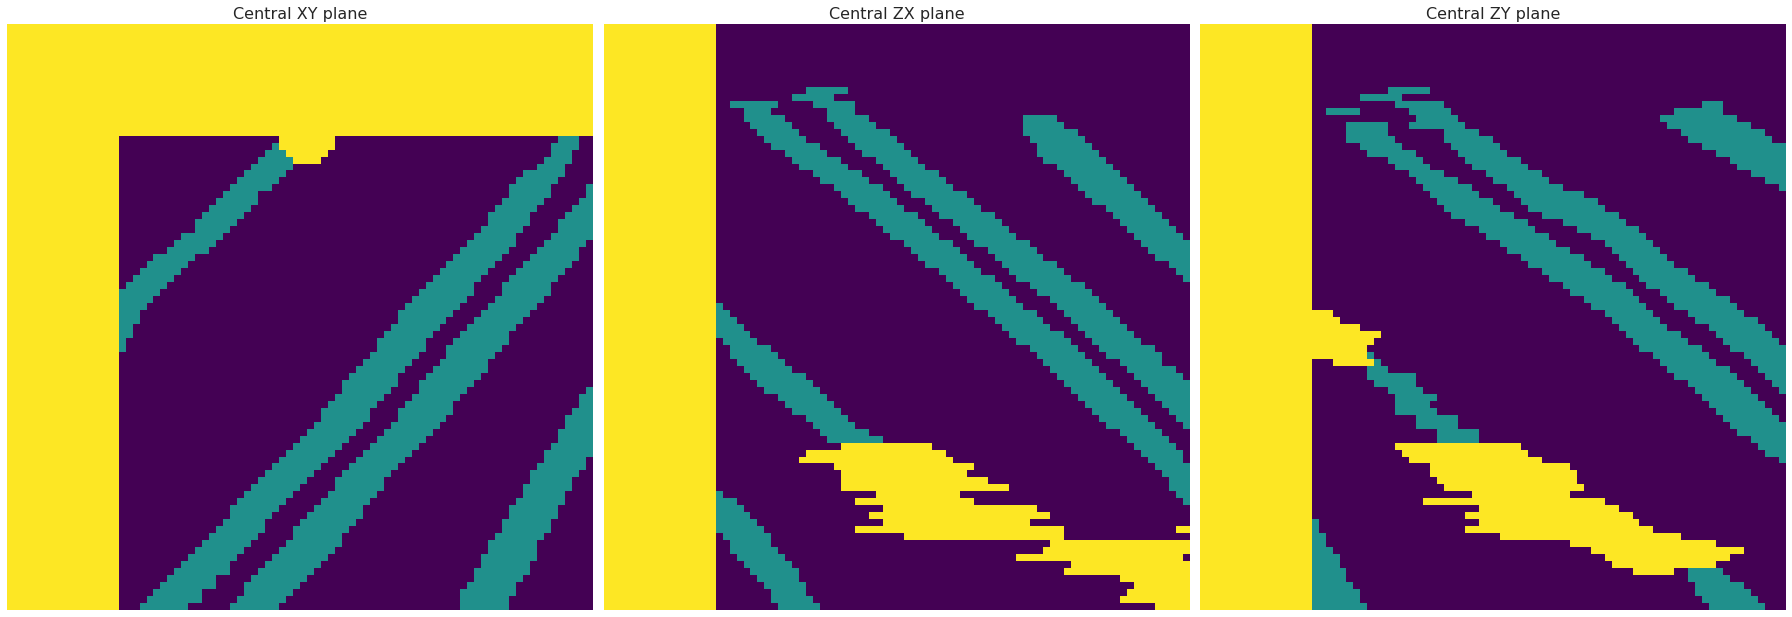

In [20]:
fig, ax = plot_centralSlices(batch_data, True)
plt.suptitle('A')
fig, ax = plot_centralSlices(batch_target, True, use_global_minMax=True)
plt.show()

In [23]:
batch_data.shape

torch.Size([84, 84, 84])

In [30]:
from tomoSegmentPipeline.dataloader import transpose_to_channels_first
transpose_to_channels_first(torch.zeros([5, 10, 20, 3])).shape

torch.Size([3, 5, 10, 20])